# <center>Major League Soccer Analysis and Prediction</center>

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/76/MLS_crest_logo_RGB_gradient.svg/1200px-MLS_crest_logo_RGB_gradient.svg.png" alt="MLS Logo" style="height: 100px; width:100px;"/></center>

<center>By Andy Niser in Summer 2022</center>

### Overview
In this project, I examine salaries and its relationship to player performance in Major League Soccer, the First Division professional soccer league in the United States.

### Purpose
As an avid soccer fan, soccer referee, and frequent attendee of Nashville SC (and previously Chicago Fire FC) matches, I was interested to discover how different clubs managed their finances and how that correlated to their success on the field. Additionally, I wanted to see if I could create a basic model that could accurately predict player salaries given performance statistics.

### Goal of this Project
Perform a detailed analysis and modelling of the dataset. I wanted to take an idea I had, plan its implementation, get data, work with it and bring the project to completion.

---

### <center> Importing Libraries <center/>

In [484]:
# importing data
import tabula

# working with data
import pandas as pd
import numpy as np

# visualizing data
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import squarify

# learning from data
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.tree import DecisionTreeClassifier

# other
from PIL import Image

---

### <center> Find and Import Data <center/>
    
The MLS Players Union (MLSPA) shares yearly salary data of players on their [website](https://mlsplayers.org/resources/salary-guide). This data is in pdf format which I need to convert to a csv for parsing into a data frame. I chose to use data from more than 5 years ago (2017) when the league was in a very different state. I will examine the past decade from that point (2008 season - 2017 season).

I used these same steps to convert the salary info pdf from each season (2008-2017) into a clean and workable dataframe. I just had to change the file that was imported! Then I saved each season's data into a table.

##### Use tabula to create a table from the pdf

In [305]:
from tabula import convert_into
table_file = r'input/2008-Salary-Information-MLS.pdf'
output_csv = r'/data/2008-data.csv'
df = convert_into(table_file, output_csv, output_format='csv', lattice=False, stream=True, pages='all')

##### Convert table into pandas dataframe

In [306]:
df = pd.read_csv('data/2008-data.csv')

##### Inspect dataset

In [307]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,2008,2008 Guaranteed
0,Club,Last Name,First Name,Pos,NaN,Base Salary,Compensation
1,LA,Adzemian,Vardan,D,$,"1 2,900.00","$12,900.00"
2,LA,Alamo,Charles,GK,$,"1 2,900.00","$12,900.00"
3,NE,Albright,Chris,D,$,"1 60,000.00","$160,000.00"
4,HOU,Alcaraz,Johnny,M,$,"1 2,900.00","$12,900.00"


In [308]:
len(df)

411

### <center> Data Cleaning <center/>

In [309]:
df = df.drop(0)

##### Separate column values and rename

In [310]:
df['Club'] = df['Unnamed: 0'].str.split().str[0]
# df['Last Name'] = df['Unnamed: 0'].str.split().str[1]
df['Last Name'] = df['Unnamed: 1']
df['First Name'] = df['Unnamed: 2']
df['Pos'] = df['Unnamed: 3']
df['Base Salary'] = df['2008']
df['Guaranteed Compensation'] = df['2008 Guaranteed']

##### Then drop those unnamed and unneeded columns

In [311]:
del df['Unnamed: 0']
del df['Unnamed: 1']
del df['Unnamed: 2']
del df['Unnamed: 3']
del df['Unnamed: 4']
del df['2008']
del df['2008 Guaranteed']

In [312]:
df.head()

,Club,Last Name,First Name,Pos,Base Salary,Guaranteed Compensation
1,LA,Adzemian,Vardan,D,"1 2,900.00","$12,900.00"
2,LA,Alamo,Charles,GK,"1 2,900.00","$12,900.00"
3,NE,Albright,Chris,D,"1 60,000.00","$160,000.00"
4,HOU,Alcaraz,Johnny,M,"1 2,900.00","$12,900.00"
5,LA,Allen,Ely,F,"1 2,900.00","$12,900.00"


##### Set `Base Salary` and `Guaranteed Compensation` types as floats and remove commas, dollar signs, and unnecessary spaces

In [313]:
df['Base Salary'] = df['Base Salary'].str.replace(',', '')
df['Base Salary'] = df['Base Salary'].str.replace(' ', '')
df['Base Salary'] = df['Base Salary'].str.replace('$', '')
df['Base Salary'] = df['Base Salary'].astype(float)

df['Guaranteed Compensation'] = df['Guaranteed Compensation'].str.replace(',', '')
df['Guaranteed Compensation'] = df['Guaranteed Compensation'].str.replace('$', '')
df['Guaranteed Compensation'] = df['Guaranteed Compensation'].astype(float)

/var/folders/56/hw854hbn3fd98b2qtyytk1340000gn/T/ipykernel_5478/1229804162.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Base Salary'] = df['Base Salary'].str.replace('$', '')
/var/folders/56/hw854hbn3fd98b2qtyytk1340000gn/T/ipykernel_5478/1229804162.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Guaranteed Compensation'] = df['Guaranteed Compensation'].str.replace('$', '')


##### Add year column so I can eventually combine all years into one dataframe

In [314]:
df['Year'] = 2008

In [315]:
df.head()

,Club,Last Name,First Name,Pos,Base Salary,Guaranteed Compensation,Year
1,LA,Adzemian,Vardan,D,12900.0,12900.0,2008
2,LA,Alamo,Charles,GK,12900.0,12900.0,2008
3,NE,Albright,Chris,D,160000.0,160000.0,2008
4,HOU,Alcaraz,Johnny,M,12900.0,12900.0,2008
5,LA,Allen,Ely,F,12900.0,12900.0,2008


##### Save each year into its own table and repeat process

In [316]:
df.to_csv('cleaned-2008-data.csv')

---

### <center> Data Wrangling <center/>

##### Combine all invidual dataframes into a collective dataframe for the entire decade

In [424]:
df_2017 = pd.read_csv('data/cleaned-2017-data.csv')
df_2016 = pd.read_csv('data/cleaned-2016-data.csv')
df_2015 = pd.read_csv('data/cleaned-2015-data.csv')
df_2014 = pd.read_csv('data/cleaned-2014-data.csv')
df_2013 = pd.read_csv('data/cleaned-2013-data.csv')
df_2012 = pd.read_csv('data/cleaned-2012-data.csv')
df_2011 = pd.read_csv('data/cleaned-2011-data.csv')
df_2010 = pd.read_csv('data/cleaned-2010-data.csv')
df_2009 = pd.read_csv('data/cleaned-2009-data.csv')
df_2008 = pd.read_csv('data/cleaned-2008-data.csv')

In [425]:
salary_data = df_2017
salary_data = pd.concat([df_2016, salary_data], axis=0)
salary_data = pd.concat([df_2015, salary_data], axis=0)
salary_data = pd.concat([df_2014, salary_data], axis=0)
salary_data = pd.concat([df_2013, salary_data], axis=0)
salary_data = pd.concat([df_2012, salary_data], axis=0)
salary_data = pd.concat([df_2011, salary_data], axis=0)
salary_data = pd.concat([df_2010, salary_data], axis=0)
salary_data = pd.concat([df_2009, salary_data], axis=0)
salary_data = pd.concat([df_2008, salary_data], axis=0)

In [426]:
len(salary_data)

5249

In [427]:
del salary_data['Unnamed: 0']

In [428]:
display(salary_data)

,Club,Last Name,First Name,Pos,Base Salary,Guaranteed Compensation,Year
0,LA,Adzemian,Vardan,D,12900.0,12900.00,2008
1,LA,Alamo,Charles,GK,12900.0,12900.00,2008
2,NE,Albright,Chris,D,160000.0,160000.00,2008
3,HOU,Alcaraz,Johnny,M,12900.0,12900.00,2008
4,LA,Allen,Ely,F,12900.0,12900.00,2008
...,...,...,...,...,...,...,...
649,POR,Zemanski,Ben,M,105000.0,109000.00,2017
650,KC,Zendejas,Adrian,GK,53000.0,53000.00,2017
651,DAL,Zimmerman,Walker,D,205000.0,205000.00,2017
652,NYRB,Zizzo,Sal,D,110000.0,110000.00,2017


##### Standardize possible positions

In [443]:
salary_data['Pos'].unique() 

array(['D', 'GK', 'M', 'F', 'F-M', 'M-F', 'D-M', 'M-D', 'MF', 'M/F',
       'M/D', 'D/M', 'D/F', 'F/M', nan], dtype=object)

When thinking about players on soccer teams, I divide them into four categories: goalkeepers (GK), defenders (D), midfielders (M), and forwards/strikers (F). Some of the players listed play multiple positions. I took the first position listed as selected that as the player's primary position.

In [478]:
def fix_position(pos):
    if pos == 'D-M':
        return str('D')
    if pos == 'F-D':
        return str('F')
    if pos == 'D-F':
        return str('D')
    if pos == 'F-M':
        return str('F')
    if pos == 'M-F':
        return str('M')
    if pos == 'M-D':
        return str('M')
    if pos == 'M/D':
        return str('M')
    if pos == 'MF':
        return str('M')
    if pos == 'F/M':
        return str('F')
    if pos == 'M/F':
        return str('M')
    if pos == 'D/M':
        return str('D')
    if pos == 'D/F':
        return 'D'
    else:
        return str(pos)
    
salary_data['Pos'] = salary_data['Pos'].apply(fix_position)

In [479]:
salary_data['Pos'].unique() 

array(['D', 'GK', 'M', 'F', 'nan'], dtype=object)

There is one player with no position listed. Based on his profile on the San Jose Eathquakes [website](https://www.sjearthquakes.com/players/matheus-silva/), he is listed as a midfielder so I updated that infomation accordingly.

In [485]:
salary_data[salary_data['Pos'] == 'nan'] 

,Year,Club,Name,Pos,Base Salary,Guaranteed Compensation
3783,2015,SJ,Matheus Silva,nan,50000.04,50000.04


In [486]:
salary_data.loc[3783, 'Pos'] = str('M')

##### Check for pool goalkeepers and players out of contract

MLS has goalkeepers who are contracted by the league and can serve as replacements to clubs as needed. During this decade of MLS, there were many of these goalkeepers including a few such as Tim Melia of Sporting Kansas City who went on to play on actual teams. Because of the growth of the USL and MLS Next Pro, teams now bring up Goalkeepers from their affiliate team if needed.

I checked to make sure all pool players were labeled correctly and removed all players out of contract. Click this [link](https://en.wikipedia.org/wiki/List_of_MLS_Pool_Goalkeepers) to learn more about these players!

(-0.5, 1399.5, 1399.5, -0.5)

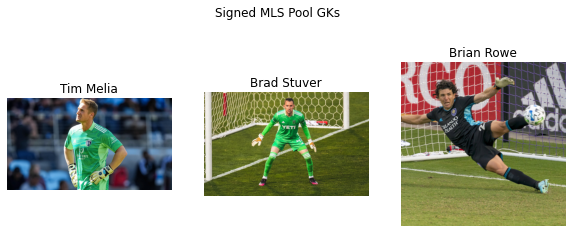

In [471]:
melia = Image.open(r'xv78xukekmywnwlnigyz.jpg')
stouver = Image.open(r'coloradorapids-38favorite5.jpg')
rowe = Image.open(r'1229864288.jpg')

f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
f.suptitle('Signed MLS Pool GKs')
plt.ion()
ax1.imshow(melia)
ax1.set_title('Tim Melia')
ax1.axis('off')
ax2.imshow(stouver)
ax2.set_title('Brad Stuver')
ax2.axis('off')
ax3.imshow(rowe)
ax3.set_title('Brian Rowe')
ax3.axis('off')

In [433]:
salary_data['Club'].unique()

array(['LA', 'NE', 'HOU', 'SJ', 'NY', 'Pool', 'KC', 'TFC', 'DAL', 'COL',
       'CHI', 'RSL', 'CHV', 'DC', 'CLB', 'SEA', 'PHI', 'None', 'VAN',
       'POR', 'TOR', 'POOL', 'MTL', nan, 'ORL', 'NYCFC', 'NYRB', 'ATL',
       'MNUFC', 'LAFC'], dtype=object)

I switched players with 'None' to `'Free Agent'` and all 'Pool' or 'POOL' players to `'POOL'`.

In [434]:
def fix_pool_and_none(player_club):
    if str(player_club) == 'None':
        return str('Free Agent')
    elif str(player_club) == 'Pool' or str(player_club) == 'POOL':
        return str('POOL')
    else:
        return str(player_club)

salary_data['Club'] = salary_data['Club'].apply(fix_pool_and_none)

I removed the Free Agents from the dataset because the are no longer contracted players in that given year. Pool players are contracted so they remained in the dataset.

In [442]:
salary_data.drop(salary_data[salary_data['Club'] == 'Free Agent'].index,
                inplace = True)

##### Combine first and last name columns

Many players such as Alex, one of my favorite Chicago Fire players when I was younger, only have one name. This is listed as their last name in the table. I wrote a function to combine the first name and last name into a new `Name` column.

(-0.5, 1258.5, 1887.5, -0.5)

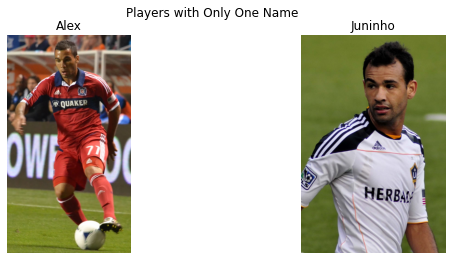

In [473]:
alex = Image.open(r'Alex_Chicago_Fire_2012.jpg')
juninho = Image.open(r'Juninho_LA_Galaxy_2011.jpg')

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4))
f.suptitle('Players with Only One Name')
plt.ion()
ax1.imshow(alex)
ax1.set_title('Alex')
ax1.axis('off')
ax2.imshow(juninho)
ax2.set_title('Juninho')
ax2.axis('off')

In [429]:
def fullname(first, last):
    if str(first) == 'nan':
        return str(last)
    else:
        return str(first) + " " + str(last)

In [430]:
salary_data['Name'] = np.vectorize(fullname)(salary_data['First Name'], 
                                             salary_data['Last Name'])

I then removed the `First Name` and `Last Name` columns.

In [431]:
salary_data = salary_data[['Year', 'Club', 'Name',
                          'Pos', 'Base Salary', 
                          'Guaranteed Compensation']]

In [488]:
display(salary_data)

,Year,Club,Name,Pos,Base Salary,Guaranteed Compensation
0,2008,LA,Vardan Adzemian,D,12900.0,12900.00
1,2008,LA,Charles Alamo,GK,12900.0,12900.00
2,2008,NE,Chris Albright,D,160000.0,160000.00
3,2008,HOU,Johnny Alcaraz,M,12900.0,12900.00
4,2008,LA,Ely Allen,F,12900.0,12900.00
...,...,...,...,...,...,...
5066,2017,POR,Ben Zemanski,M,105000.0,109000.00
5067,2017,KC,Adrian Zendejas,GK,53000.0,53000.00
5068,2017,DAL,Walker Zimmerman,D,205000.0,205000.00
5069,2017,NYRB,Sal Zizzo,D,110000.0,110000.00


In [484]:
salary_data.reset_index(drop=True, inplace=True)

In [489]:
salary_data.to_csv('data/salary-data-2008-2017.csv')

---

### <center> Exploratory Data Analysis <center/>

In [138]:
salary_data = pd.read_csv('data/salary-data-2008-2017.csv')

##### Quick initial overview

In [148]:
salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5071 entries, 0 to 5070
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Year                     5071 non-null   int64  
 1   Club                     5071 non-null   object 
 2   Name                     5071 non-null   object 
 3   Pos                      5071 non-null   object 
 4   Base Salary              5071 non-null   float64
 5   Guaranteed Compensation  5071 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 237.8+ KB


I have 1 int type, 2 float types, and 3 string types.

### I'll start by checking out the growth of the league!

The sheer number of players has increased dramatically!

##### Players by Season

In [142]:
players_by_year = salary_data[['Year', 'Name']]
players_by_year = players_by_year.rename(columns={'Name': 'Players'})
players_by_year = players_by_year.groupby(['Year'])
players_by_year = players_by_year.count()
display(players_by_year)

,Players
Year,
2008,394
2009,373
2010,395
2011,508
2012,535
2013,557
2014,553
2015,555
2016,566


Text(0.5, 1.0, '# of Players in MLS over the Decade')

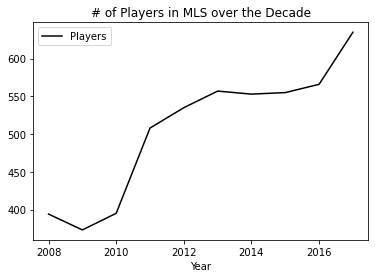

In [143]:
players_by_year.plot(kind='line', color='black')
plt.title('# of Players in MLS over the Decade')

In [124]:
roc = (635-394)/(2017-2008)
roc

26.77777777777778

The league grew an average of 26.778 players per year. That is a really large amount given that the maximum roster size for a MLS franchise is 30 players, which is then narrowed down to 18 player for every game.

In [145]:
players_by_year['Increase']=players_by_year['Players']-players_by_year['Players'].shift(1)

In [146]:
players_by_year

,Players,Increase
Year,,
2008,394,NaN
2009,373,-21.0
2010,395,22.0
2011,508,113.0
2012,535,27.0
2013,557,22.0
2014,553,-4.0
2015,555,2.0
2016,566,11.0


The biggest increase in the amount of players in the league came in 2011 and 2017. These years saw MLS have its largest expansion to new major markets now known for their popular soccer following, including Portland, Vancouver, Atlanta, and Minneapolis-St. Paul.

In [153]:
salary_data['Club'].value_counts()

DAL      288
LA       287
SJ       275
DC       275
COL      274
CLB      274
CHI      273
RSL      266
KC       264
HOU      263
NE       260
SEA      255
PHI      222
NY       219
VAN      207
POR      203
CHV      199
MTL      171
TOR      166
TFC      102
ORL       96
NYCFC     86
NYRB      56
ATL       36
MNUFC     29
POOL      22
LAFC       3
Name: Club, dtype: int64

There was the most data on teams that have been in the league since 2007 as they have had the most players. Newer franchises therefore had less player data. 

LAFC did not begin play until 2018, so their 3 players were their designated players signed well in advance of their debut. Chivas USA folded after the 2014 season, so their information only runs through then.

##### Players by Position by Season

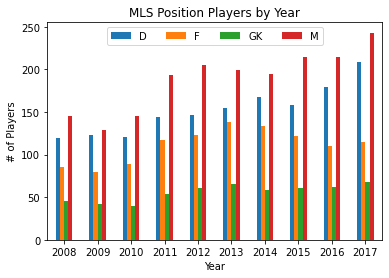

In [80]:
pos_df = salary_data.groupby(['Year', 'Pos']).size().unstack()
pos_df.plot(kind = 'bar')
plt.legend(loc="upper center", ncol=len(pos_df.columns))
plt.title('MLS Position Players by Year')
plt.ylabel('# of Players')
plt.xticks(rotation=0)
plt.show()

The number of midfielders has increased dramatically over the decade. However, despite more franchises, the number of forwards has remained relatively constant.

In [81]:
pos_df

Pos,D,F,GK,M
Year,,,,
2008,119,85,45,145
2009,123,79,42,129
2010,121,89,40,145
2011,144,117,54,193
2012,146,123,61,205
2013,155,138,65,199
2014,167,133,59,194
2015,158,122,61,214
2016,179,110,62,215


Midfielder is the most common position in the league and then defender. These two positions make up the large majority of players in the league.

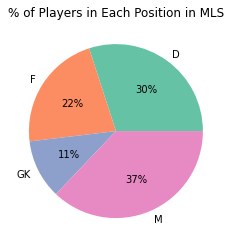

In [158]:
pos_counts = [pos_df['D'].sum(), pos_df['F'].sum(), pos_df['GK'].sum(), pos_df['M'].sum()]
labels = ['D','F','GK','M']
colors = sns.color_palette("Set2")
plt.pie(pos_counts, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('% of Players in Each Position in MLS')
plt.show()

---

### Next, I'll look at club and player finances!

##### Average Salary by Year

In [208]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
avg_sal_by_club = salary_data.groupby(['Club', 'Year']).mean()
avg_sal_by_club = avg_sal_by_club.groupby(['Year']).mean()
display(avg_sal_by_club)

,Base Salary,Guaranteed Compensation
Year,,
2008,97930.273592,107644.368548
2009,118114.199663,130262.178188
2010,150915.315839,168040.999294
2011,132054.283694,149687.920293
2012,152398.410184,177411.410390
2013,135464.211469,152541.586623
2014,231882.201088,253280.276913
2015,246254.145546,269689.201469
2016,272846.124875,300679.805839


Text(0.5, 1.0, 'MLS League Average Compensation by Year')

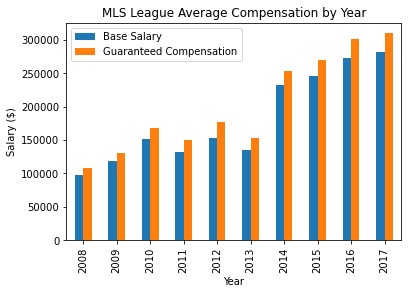

In [209]:
avg_sal_by_club.plot(kind='bar')
plt.ylabel('Salary ($)')
plt.title('MLS League Average Compensation by Year')

##### League Change in Average Compensation

In [210]:
avg_sal_by_club.max()/avg_sal_by_club.min()

Base Salary                2.874272
Guaranteed Compensation    2.879616
dtype: float64

The league average salary in 2017, the highest of the decade, is 2.87 times larger than it was in 2008.

##### Compare League Salary Increase to Change in Consumer Price Index (CPI)

In [218]:
avg_sal_by_club['Percent Increase']=avg_sal_by_club['Base Salary']/avg_sal_by_club['Base Salary'].shift(1)

In [259]:
avg_sal_change = avg_sal_by_club.drop(columns=['Base Salary', 'Guaranteed Compensation'])

In [260]:
avg_sal_change

,Percent Increase
Year,
2008,NaN
2009,1.206105
2010,1.277707
2011,0.875022
2012,1.154059
2013,0.888882
2014,1.711760
2015,1.061980
2016,1.107986


<Figure size 720x360 with 0 Axes>

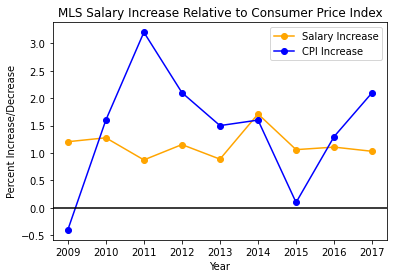

In [293]:
plt.figure(figsize=(10,5))

fig, ax = plt.subplots()

ax.plot(year, sal_inc,label='Salary Increase', **{'color': 'orange', 'marker': 'o'})
ax.plot(year,inc,label='CPI Increase', **{'color': 'blue', 'marker': 'o'})
plt.axhline(y=0, color='black', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Percent Increase/Decrease')
plt.title('MLS Salary Increase Relative to Consumer Price Index')

plt.legend(loc='best')
plt.show()

In [296]:
sum(sal_inc)/len(sal_inc)

1.1461264251325523

According to this visual, MLS Salaries generally grew below the [annual rate of inflation](https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-). Especially during the period from 2011-2013, players with fixed salaries were making less than they were previously.

MLS salaries grew an average of 1.146% per year.

##### Average Salary by Club over the Decade

In [192]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
avg_sal_by_club = salary_data.groupby(['Club', 'Year']).mean()
avg_sal_by_club = avg_sal_by_club.groupby(['Club']).mean()
avg_sal_by_club.sort_values(by='Base Salary', ascending=False)

,Base Salary,Guaranteed Compensation
Club,,
ORL,627478.480590,679834.722586
NYCFC,534185.108631,549094.131034
TOR,415274.397446,462099.902563
LA,412548.329486,466622.521496
NY,304327.297830,328445.981865
NYRB,216926.501181,240603.575223
SEA,199207.416106,223842.056081
TFC,191946.699271,231945.512087
POR,181846.885690,203740.037673


Orlando City had the highest average salary of any club over the decade by a large amount despite only joining the league in 2015. In contrast, FC Dallas had the lowest average salary out of clubs that were playing in the 2017 season.

##### Total Salary by Club

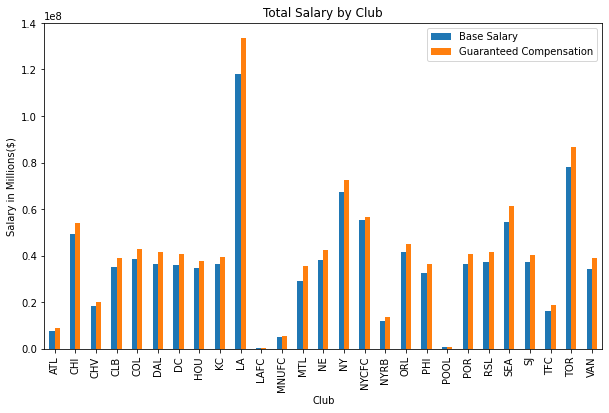

In [340]:
salary_by_club = salary_data.groupby(['Club']).sum()
salary_by_club.plot(kind = 'bar', title = "Total Salary by Club",figsize=(10,6)).set_ylabel("Salary in Millions($)");

In [366]:
clubs = salary_data['Club'].tolist()
x = np.array(clubs)
clubs = np.unique(x).tolist()

##### Treemap of Club Total Salaries to Show Size Difference

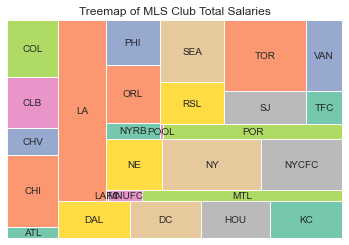

In [369]:
sns.set_style(style="whitegrid")
sizes= salary_by_club["Base Salary"].values
squarify.plot(sizes=sizes, label=clubs, alpha=0.9,color=colors).set(title='Treemap of MLS Club Total Salaries')
plt.axis('off')
plt.show()

In [347]:
salary_by_club

,Base Salary,Guaranteed Compensation
Club,,
ATL,7.726160e+06,8.727826e+06
CHI,4.937559e+07,5.403995e+07
CHV,1.840474e+07,2.025685e+07
CLB,3.522402e+07,3.915885e+07
COL,3.871186e+07,4.277933e+07
DAL,3.646073e+07,4.166316e+07
DC,3.584337e+07,4.067777e+07
HOU,3.469652e+07,3.783440e+07
KC,3.628707e+07,3.947093e+07


##### Median Salary by Club over the Decade

There are some outliers in this data because MLS Designated Players make significantly more money than other players. Looking at the median salary average per club, this appears to to be the case.

In [320]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
avg_sal_by_club = salary_data.groupby(['Club', 'Year']).median()
avg_sal_by_club = avg_sal_by_club.groupby(['Club']).mean()
avg_sal_by_club.sort_values(by='Base Salary', ascending=False)

,Base Salary,Guaranteed Compensation
Club,,
MNUFC,135000.000000,171875.000000
TFC,128407.000000,161573.134000
NYRB,105000.000000,126500.000000
POR,102857.428571,109905.949286
HOU,100808.000000,110671.063500
PHI,93985.435000,114763.300625
NYCFC,93750.020000,103875.010000
LA,89790.440000,98365.092000
ORL,89632.250000,103381.250000


The median is a better representation than the mean for the salaries on each team.

##### What was Orlando City's average salary so big?

In [310]:
max_player_sals = salary_data.reset_index().groupby('Name').max()
max_player_sals.loc[max_player_sals['Club'] == 'ORL'].sort_values(by='Base Salary', ascending=False)

,index,Year,Club,Pos,Base Salary,Guaranteed Compensation
Name,,,,,,
Kaka,4749,2017,ORL,M,6660000.0,7167500.00
Antonio Nocerino,4868,2017,ORL,M,800000.0,850000.00
Dom Dwyer,4621,2017,ORL,F,550000.0,668750.00
Jonathan Spector,4984,2017,ORL,D,549996.0,611933.50
Yoshimar Youth,5062,2017,ORL,M,549996.0,599996.00
Aurelien Collin,4570,2017,ORL,D,500000.0,525000.00
David Mateos Ramajo,4298,2016,ORL,D,420000.0,453333.33
Carlos Rivas,4924,2017,ORL,M,375000.0,375000.00
Kevin Molino,4843,2017,ORL,M,350004.0,402504.00


Orlando City's average salary was so large because they paid Kaka, a legendary Brazilian player, `$6.66 Million` a Year.

In [316]:
salary_data.sort_values('Guaranteed Compensation', ascending=False).groupby('Year', as_index=False).first()

,Year,Club,Name,Pos,Base Salary,Guaranteed Compensation
0,2008,LA,David Beckham,M,5500000.08,6500000.04
1,2009,LA,David Beckham,M,5500000.08,6500000.04
2,2010,LA,David Beckham,M,5500000.08,6500000.04
3,2011,LA,David Beckham,M,5500000.08,6500000.04
4,2012,NY,Rafael Marquez,D,4600000.00,4600000.00
5,2013,NY,Thierry Henry,F,3750000.00,4350000.00
6,2014,ORL,Kaka,M,6660000.00,7167500.00
7,2015,ORL,Kaka,M,6660000.00,7167500.00
8,2016,ORL,Kaka,M,6660000.00,7167500.00
9,2017,ORL,Kaka,M,6660000.00,7167500.00


Kaka was also the highest paid player in the league and in league history at that time.

##### MLS Player Salary Differences

In [317]:
salary_data.groupby(by = 'Year')['Base Salary'].min()

Year
2008    12900.00
2009    15300.00
2010    31250.04
2011    32600.00
2012    33750.00
2013    35125.00
2014    36500.00
2015    50000.00
2016    51492.00
2017    52999.92
Name: Base Salary, dtype: float64

While Kaka was making his millions, players on the lower end of the league were barely scraping by, with some making as low as $53000 in 2017.

The difference in the min and max salary was consistent with who was the highest paid player. Their salary flutuated much more than the difference of the lowest salary in the league

In [319]:
salary_data.groupby(by = 'Year')['Base Salary'].max()-salary_data.groupby(by = 'Year')['Base Salary'].min()

Year
2008    5487100.08
2009    5484700.08
2010    5512749.96
2011    5467400.08
2012    4566250.00
2013    3964875.00
2014    6623500.00
2015    6610000.00
2016    6608508.00
2017    6607000.08
Name: Base Salary, dtype: float64

##### Highest Paid Player Per Club Per Season

In [321]:
salary_data.sort_values('Base Salary', ascending=False).groupby(['Year', 'Club'], as_index=False).first()

,Year,Club,Name,Pos,Base Salary,Guaranteed Compensation
0,2008,CHI,Cuauhtemoc Blanco,M,2492316.00,2666778.00
1,2008,CHV,Ante Razov,F,255000.00,258750.00
2,2008,CLB,Guillermo Barros Schelotto,F,250000.00,375000.00
3,2008,COL,Christian Gomez,M,385000.00,430000.00
4,2008,DAL,Dulio Davino,D,400000.00,400000.00
5,2008,DC,Marcelo Gallardo,M,1500000.00,1874006.00
6,2008,HOU,Dwayne DeRosario,M,324999.96,324999.96
7,2008,KC,Claudio Lopez,F,720000.00,820000.00
8,2008,LA,David Beckham,M,5500000.08,6500000.04
9,2008,NE,Taylor Twellman,F,325008.00,350008.00


##### Highest Paid Player Per Club over the Decade

In [322]:
salary_data.sort_values('Base Salary', ascending=False).groupby(['Club'], as_index=False).first()

,Club,Year,Name,Pos,Base Salary,Guaranteed Compensation
0,ATL,2017,Miguel Almiron,M,1912500.00,2297000.00
1,CHI,2017,Bastian Schweinsteiger,M,5400000.00,5400000.00
2,CHV,2011,Juan Pablo Angel,F,1000000.00,1250000.00
3,CLB,2015,Federico Higuain,M,1175000.00,1175000.00
4,COL,2016,Tim Howard,GK,2100000.00,2575000.00
5,DAL,2012,Julian de Guzman,M,1863996.00,1910746.00
6,DC,2008,Marcelo Gallardo,M,1500000.00,1874006.00
7,HOU,2014,DaMarcus Beasley,D,750000.00,779166.67
8,KC,2017,Roger Espinoza,M,850000.00,850000.00
9,LA,2015,Steven Gerrard,M,6200004.00,6332504.00


All clubs except Houston, Minnesota, and Kansas City had a player who made over a million dollars.

##### Top 20 Highest Paid Players over the Decade

In [323]:
top_paid_players = salary_data.drop_duplicates(subset='Name')
top_paid_players.sort_values('Base Salary', ascending = False).head(20)

,Year,Club,Name,Pos,Base Salary,Guaranteed Compensation
3021,2014,ORL,Kaka,M,6660000.00,7167500.00
3499,2015,LA,Steven Gerrard,M,6200004.00,6332504.00
2886,2014,TOR,Jermain Defoe,F,6000000.00,6180000.00
3591,2015,NYCFC,Frank Lampard,M,6000000.00,6000000.00
2831,2014,TOR,Michael Bradley,M,6000000.00,6500000.00
4073,2016,TOR,Sebastian Giovinco,F,5600000.00,7115555.67
997,2010,NY,Rafael Marquez,D,5544000.00,5544000.00
21,2008,LA,David Beckham,M,5500000.08,6500000.04
4963,2017,CHI,Bastian Schweinsteiger,M,5400000.00,5400000.00
924,2010,NY,Thierry Henry,F,5000000.04,5600000.04


These players were famous before coming to the league. Their salaries are especially high considering their ages.

---

### Using Machine Learning to Predict Future League Wages!

Now that I've analyzed patterns related to MLS and its finances, I want to see if I can use that data and [player statstics from a season](https://www.kaggle.com/datasets/antoinekrajnc/soccer-players-statistics) to predict future salaries.

##### Find and input dataset with appropriate player stats

In [376]:
stat_data = pd.read_csv('data/player-stats.csv')
stat_data.head()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
0,Cristiano Ronaldo,Portugal,LS,7.0,Real Madrid,LW,7.0,07/01/2009,2021.0,94,185 cm,80 kg,Right,02/05/1985,32,LW/ST,High / Low,4,5,93,92,22,23,31,63,96,94,29,85,86,84,83,77,91,92,92,80,63,90,95,85,92,93,90,81,76,85,88,14,7,15,11,11
1,Lionel Messi,Argentina,RW,10.0,FC Barcelona,RW,10.0,07/01/2004,2018.0,93,170 cm,72 kg,Left,06/24/1987,29,RW,Medium / Medium,4,4,95,97,13,26,28,48,95,93,22,90,94,77,88,87,92,87,74,59,95,90,68,71,85,95,88,89,90,74,85,14,6,15,11,8
2,Neymar,Brazil,LW,10.0,FC Barcelona,LW,11.0,07/01/2013,2021.0,92,174 cm,68 kg,Right,02/05/1992,25,LW,High / Medium,5,5,95,96,21,33,24,56,88,90,36,80,80,75,81,75,93,90,79,49,82,96,61,62,78,89,77,79,84,81,83,15,9,15,9,11
3,Luis Suárez,Uruguay,LS,9.0,FC Barcelona,ST,9.0,07/11/2014,2021.0,92,182 cm,85 kg,Right,01/24/1987,30,ST,High / Medium,4,4,91,86,30,38,45,78,93,92,41,84,83,77,83,64,88,77,89,76,60,86,69,77,87,94,86,86,84,85,88,33,27,31,25,37
4,Manuel Neuer,Germany,GK,1.0,FC Bayern,GK,1.0,07/01/2011,2021.0,92,193 cm,92 kg,Right,03/27/1986,31,GK,Medium / Medium,4,1,48,30,10,11,10,29,85,12,30,70,70,15,55,59,58,61,44,83,35,52,78,25,25,13,16,14,11,47,11,91,89,95,90,89


##### Filter dataset to only players in MLS

In [381]:
player_salaries_and_stats = stat_data[stat_data['Name'].isin(salary_data['Name'].tolist())]

In [383]:
player_salaries_and_stats.tail()

,Name,Nationality,National_Position,National_Kit,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes
17418,Raheem Edwards,Canada,NaN,NaN,Toronto FC,Sub,44.0,03/02/2017,2020.0,62,175 cm,67 kg,Left,07/15/1995,21,LM,High / Medium,2,3,61,63,38,46,41,59,52,55,41,49,41,56,55,52,86,84,68,53,76,78,61,46,57,54,48,39,39,49,39,10,7,10,14,9
17475,Adonijah Reid,Canada,NaN,NaN,FC Dallas,Res,28.0,01/13/2017,2020.0,49,165 cm,68 kg,Right,08/13/1999,17,ST,High / Low,3,3,41,42,18,17,16,28,48,51,11,47,40,27,44,30,54,54,56,42,89,57,65,47,44,56,45,35,33,62,36,10,15,12,13,13
17476,Jacori Hayes,United States,NaN,NaN,FC Dallas,Sub,15.0,01/13/2017,2020.0,49,170 cm,68 kg,Right,06/28/1995,21,CM,High / Medium,3,2,47,47,30,48,36,42,51,40,22,46,54,44,61,60,67,63,46,43,83,57,56,37,45,37,37,45,44,43,36,14,10,6,6,13
17510,George Malki,United States,NaN,NaN,Houston Dynamo,Res,21.0,03/01/2017,2023.0,49,178 cm,72 kg,Right,04/21/1992,24,CM,Medium / Medium,2,3,48,44,39,49,42,58,47,54,37,50,43,38,55,52,64,67,55,50,69,54,63,46,54,26,31,40,39,37,31,11,11,8,14,15
17554,Jordy Delem,France,NaN,NaN,Sounders FC,Res,21.0,03/02/2017,2020.0,47,180 cm,71 kg,Right,03/18/1993,24,CDM,Medium / High,3,2,40,41,40,51,44,54,50,36,43,42,42,45,51,50,55,63,45,50,67,51,55,43,48,28,28,35,39,41,25,11,14,14,8,9


##### Add `Base Salary` and `Guaranteed Compensation` Columns

In [386]:
for player in player_salaries_and_stats['Name']:
    player_salaries_and_stats['Base Salary'] = salary_data[salary_data['Name'].isin([player])].reset_index()['Base Salary'][0]

for player in player_salaries_and_stats['Name']:    
    player_salaries_and_stats['Guaranteed Compensation']= salary_data[salary_data['Name'].isin([player])].reset_index()['Guaranteed Compensation'][0]

/var/folders/56/hw854hbn3fd98b2qtyytk1340000gn/T/ipykernel_10070/2145130187.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_salaries_and_stats['Base Salary']=[salary_data[salary_data['Name'].isin([player])].reset_index()['Base Salary'][0]
/var/folders/56/hw854hbn3fd98b2qtyytk1340000gn/T/ipykernel_10070/2145130187.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_salaries_and_stats['Guaranteed Compensation']=[salary_data[salary_data['Name'].isin([player])].reset_index()['Guaranteed Compen

##### Remove Unneeded Columns

In [389]:
del player_salaries_and_stats['Nationality']
del player_salaries_and_stats['National_Position']
del player_salaries_and_stats['National_Kit']

##### Change Salary Columns to int values for use in making predictions!

In [421]:
player_salaries_and_stats = player_salaries_and_stats.astype({'Base Salary': 'int64', 'Guaranteed Compensation': 'int64'})

In [422]:
player_salaries_and_stats.tail()

,Name,Club,Club_Position,Club_Kit,Club_Joining,Contract_Expiry,Rating,Height,Weight,Preffered_Foot,Birth_Date,Age,Preffered_Position,Work_Rate,Weak_foot,Skill_Moves,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,Vision,Composure,Crossing,Short_Pass,Long_Pass,Acceleration,Speed,Stamina,Strength,Balance,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys,GK_Positioning,GK_Diving,GK_Kicking,GK_Handling,GK_Reflexes,Base Salary,Guaranteed Compensation
17418,Raheem Edwards,Toronto FC,Sub,44.0,03/02/2017,2020.0,62,175 cm,67 kg,Left,07/15/1995,21,LM,High / Medium,2,3,61,63,38,46,41,59,52,55,41,49,41,56,55,52,86,84,68,53,76,78,61,46,57,54,48,39,39,49,39,10,7,10,14,9,53004,53004
17475,Adonijah Reid,FC Dallas,Res,28.0,01/13/2017,2020.0,49,165 cm,68 kg,Right,08/13/1999,17,ST,High / Low,3,3,41,42,18,17,16,28,48,51,11,47,40,27,44,30,54,54,56,42,89,57,65,47,44,56,45,35,33,62,36,10,15,12,13,13,70000,84375
17476,Jacori Hayes,FC Dallas,Sub,15.0,01/13/2017,2020.0,49,170 cm,68 kg,Right,06/28/1995,21,CM,High / Medium,3,2,47,47,30,48,36,42,51,40,22,46,54,44,61,60,67,63,46,43,83,57,56,37,45,37,37,45,44,43,36,14,10,6,6,13,65000,72500
17510,George Malki,Houston Dynamo,Res,21.0,03/01/2017,2023.0,49,178 cm,72 kg,Right,04/21/1992,24,CM,Medium / Medium,2,3,48,44,39,49,42,58,47,54,37,50,43,38,55,52,64,67,55,50,69,54,63,46,54,26,31,40,39,37,31,11,11,8,14,15,65004,65004
17554,Jordy Delem,Sounders FC,Res,21.0,03/02/2017,2020.0,47,180 cm,71 kg,Right,03/18/1993,24,CDM,Medium / High,3,2,40,41,40,51,44,54,50,36,43,42,42,45,51,50,55,63,45,50,67,51,55,43,48,28,28,35,39,41,25,11,14,14,8,9,53004,53004


##### `GK_Reflexes`???

Looking at the dataset again, I find it funny that there are goalkeeper stats for every field player! I wonder how that came to be and what criteria is used?

### Split Data into Training/Testing Sets

Chose to split `test_size` based on the the **Pareto Principle** which is a theory maintaining that 80 percent of the output from a given situation or system is determined by 20 percent of the input.

Chose 42 as `random_state` to reproduce the same result after reusing train_test_split.

In [466]:
df_train_features = player_salaries_and_stats[['Rating', 'Reactions','Vision','Composure','Freekick_Accuracy']]

x_train, x_test, y_train, y_test = train_test_split(df_train_features, 
                                                    player_salaries_and_stats['Base Salary'], 
                                                    test_size=0.2, 
                                                    random_state=42)

##### Use DecisionTreeClassifier to make predictions... 

In [467]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train,y_train)
tree_pred = decision_tree.predict(x_test)

##### Make new DataFrame to examine results!

In [468]:
pred_df = pd.DataFrame(x_test)
pred_df['Prediction'] = tree_pred

##### Add Salary Info

In [469]:
pred_df['Base Salary']=[player_salaries_and_stats['Base Salary'][index] for index in pred_df.reset_index()['index']]

In [470]:
pred_df['Name']=[player_salaries_and_stats['Name'][index] for index in pred_df.reset_index()['index']]

##### Determine Amount of Error and Accuracy Score

In [473]:
print('Decision Tree Accuracy Score:', accuracy_score(y_test, tree_pred)*100,'%')

Decision Tree Accuracy Score: 0.9090909090909091 %


The Decision Tree Classifer had an accuracy score of 0.90%. This is pretty terrible.

In [481]:
pred_df['Error'] = pred_df['Prediction'] - pred_df['Base Salary']
pred_df['Percent Error']= abs((pred_df['Error'] / pred_df['Base Salary']) * 100)

In [483]:
pred_df.sort_values(by='Percent Error')

,Rating,Reactions,Vision,Composure,Freekick_Accuracy,Prediction,Base Salary,Name,Error,Percent Error
17377,50,40,32,41,20,53004,53004,Nathan Smith,0,0.000000
15895,56,46,29,38,26,65000,65004,Matej Dekovic,-4,0.006153
17053,52,46,29,44,21,53004,53000,Reggie Cannon,4,0.007547
15940,56,55,51,50,41,62499,62508,Ricardo Velazco,-9,0.014398
15683,57,51,49,51,14,53000,51500,Calle Brown,1500,2.912621
8017,67,62,61,65,58,100000,96000,Alex,4000,4.166667
10709,64,55,29,53,25,80000,84996,Alex Crognale,-4996,5.877924
159,83,81,85,88,86,6000000,5600000,Sebastian Giovinco,400000,7.142857
13278,61,56,58,61,41,135000,124992,Jackson Yueill,10008,8.006912
5682,69,66,35,55,26,65000,60000,Tim Parker,5000,8.333333


In [482]:
pred_df.mean()['Percent Error']

/var/folders/56/hw854hbn3fd98b2qtyytk1340000gn/T/ipykernel_10070/2248907973.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pred_df.mean()['Percent Error']


164.16363653492428

### Analysis

Considering that the prediction model was off on average by 164%, it is clear that it is very hard to predict MLS salaries. There are many factors that go into these decisions and player performance (especially just in one season) isn't always weighted the most. This was a very basic model but still helped me come to this conclusion.

---

### Conclusion

Thanks for checking out this project. If you want to discuss more (or talk about MLS!) reach out to me at my LinkedIn below.

Andy Niser

[![GitHub Badge](https://img.shields.io/badge/GitHub-100000?style=for-the-badge&logo=github&logoColor=white)](https://github.com/andyniser)

[![LinkedIn Badge](https://img.shields.io/badge/LinkedIn-0077B5?style=for-the-badge&logo=linkedin&logoColor=white)](https://linkedin.com/in/andyniser)